# Assignment 7 - kNN, Decision Tree, RandomForest

We will work here on a data set taken from Scikit-Learn about the characteristics of malignant and benign breast tumors to prevent the risk of cancer.

## Preparation of the data set

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

**Loading the data set from Scikit-Learn**

In [3]:
from sklearn.datasets import load_breast_cancer
data_all = load_breast_cancer()

**Checking the keys of the dictionary loaded**

In [4]:
data_all.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

**Getting a description of the data set**

In [5]:
print(data_all.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

**Preparing the data frame of all features**

In [6]:
data_all.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
features = pd.DataFrame(data=data_all.data, columns=data_all.feature_names)
features.sample(n=8, random_state=1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.13120,0.36350,0.3219,0.11080,0.2827,0.09208
47,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,15.67,27.95,102.80,759.4,0.17860,0.41660,0.5006,0.20880,0.3900,0.11790
292,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,0.06470,...,13.74,19.93,88.81,585.4,0.14830,0.20680,0.2241,0.10560,0.3380,0.09584
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.24450,0.3538,0.15710,0.3206,0.06938
414,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294,...,17.26,36.91,110.10,931.4,0.11480,0.09866,0.1547,0.06575,0.3233,0.06165
132,16.16,21.54,106.20,809.8,0.10080,0.12840,0.10430,0.05613,0.2160,0.05891,...,19.47,31.68,129.70,1175.0,0.13950,0.30550,0.2992,0.13120,0.3480,0.07619
161,19.19,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.09667,0.1741,0.05176,...,22.03,17.81,146.60,1495.0,0.11240,0.20160,0.2264,0.17770,0.2443,0.06251
197,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.11030,0.05778,0.1770,0.05340,...,19.76,24.70,129.10,1228.0,0.08822,0.19630,0.2535,0.09181,0.2369,0.06558


**Preparing the data frame of the target**

In [8]:
target = pd.DataFrame(data=data_all.target, columns=['tumor type'])
target.sample(n=8, random_state=1)

,tumor type
421,1
47,0
292,1
186,0
414,0
132,0
161,0
197,0


**To make the target encoding more obvious (we want to predict the risk of cancer), we invert the encoding values so that now 0 codes benign and 1 codes malignant**

In [9]:
target = target.replace({0:1, 1:0})
target.sample(n=8, random_state=1)

,tumor type
421,0
47,1
292,0
186,1
414,1
132,1
161,1
197,1


# Your turn

For this assinment, we will use two features: **mean radius** and **mean texture**.

## 0. Prepare your dataset
- You should end up with the following variables: X_train, X_val, X_test, y_train, y_val, y_test
- Don't forget to scale your features
- Use only the features mentioned above.

In [10]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=1)

# Further splitting the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)


## 1. a) Train a k-NN with k=5 and plot the decision areas based on that model.

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler  # Import StandardScaler
from matplotlib.colors import ListedColormap

# Create a k-NN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train the k-NN classifier on the scaled training data
knn.fit(X_train_scaled, y_train.values.ravel())



KNeighborsClassifier()

You can use this function to plot the decision area

In [12]:
# We define a function for plotting the 2D decision areas of a classifier

def plot_decision_areas(X_toplot, y_toplot, classifier, scaler):
    
    from matplotlib.colors import ListedColormap
    fig = plt.figure(figsize=(10, 6))

    # Preparation of the data set that will be displayed (without scaling)
    X_set, y_set = scaler.inverse_transform(X_toplot), y_toplot

    # Creation of a data grid (for the decision area)
    X_step = 0.05  # Grid step on X-axis
    Y_step = 0.05  # Grid step on Y-axis
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = X_step),
        np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = Y_step))

    # Plotting the decision boundary
    plt.contourf(X1, X2, classifier.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
        alpha = 0.75, cmap = ListedColormap(('salmon', 'lightgreen')))

    # Plotting the data set
    for y_set_index, y_set_value in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == y_set_value, 0], X_set[y_set == y_set_value, 1], color = ListedColormap(('red', 'green'))(y_set_index), label = y_set_value)

    # Configuration of the figure
    plt.xlim(X_set[:,0].min(), X_set[:,0].max())
    plt.ylim(X_set[:,1].min(), X_set[:,1].max())
    plt.legend(title='Tumor type')
    plt.title(str(classifier))
    plt.xlabel('Mean radius')
    plt.ylabel('Mean texture')

    plt.show()

## b) Explore different values of k to determine an optimal value.
Make a graph to show your results and decide what value of k is optimal.

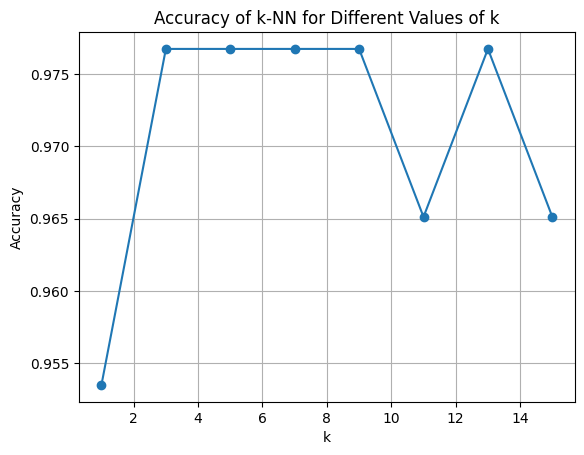

Optimal value of k: 3


In [13]:
from sklearn.metrics import accuracy_score

# Define a list of different values of k to explore
k_values = [1, 3, 5, 7, 9, 11, 13, 15]

# Initialize lists to store accuracy scores for different k values
accuracy_scores = []

# Train and evaluate the k-NN classifier for each value of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train.values.ravel())
    y_pred = knn.predict(X_val_scaled)
    accuracy = accuracy_score(y_val, y_pred)
    accuracy_scores.append(accuracy)

# Plot the accuracy scores for different k values
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy of k-NN for Different Values of k')
plt.grid(True)
plt.show()

# Determine the optimal value of k based on the highest accuracy score
optimal_k = k_values[np.argmax(accuracy_scores)]
print("Optimal value of k:", optimal_k)


What value of k do you choose and why?

we choose k= 3

## 2.a) Train a Decision Tree and plot the decision areas based on that model.


c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


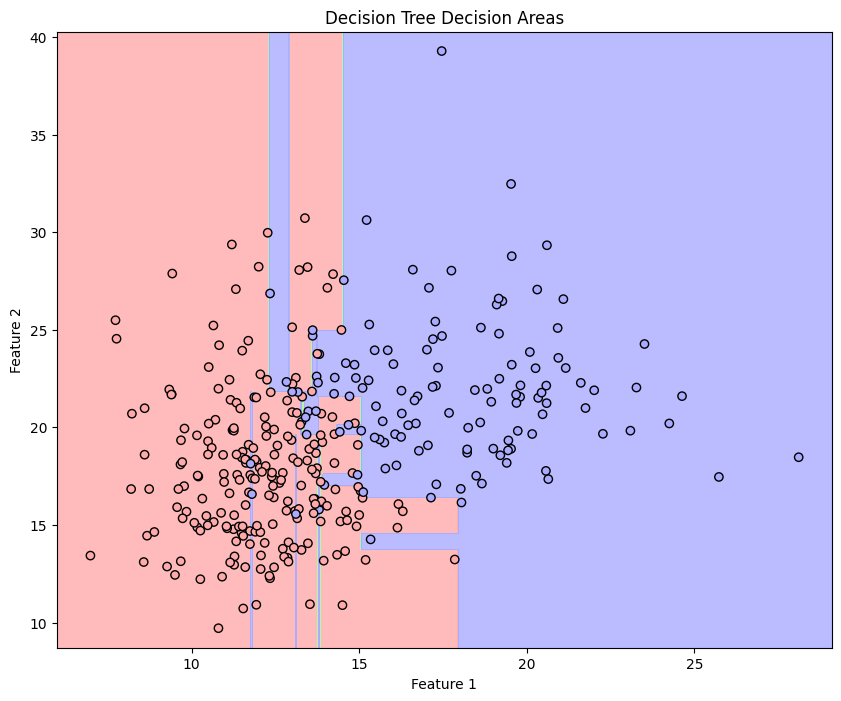

In [14]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder

# Selecting two specific features for plotting
X_train_subset = X_train.iloc[:, [0, 1]]

# Train a Decision Tree classifier on the subset of features
dt_subset = DecisionTreeClassifier()
dt_subset.fit(X_train_subset, y_train)

# Define the meshgrid range for the plot
plot_step = 0.02

# Determine the minimum and maximum values for each feature
x_min, x_max = X_train_subset.iloc[:, 0].min() - 1, X_train_subset.iloc[:, 0].max() + 1
y_min, y_max = X_train_subset.iloc[:, 1].min() - 1, X_train_subset.iloc[:, 1].max() + 1

# Generate a meshgrid of points with the defined ranges
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

# Predict the class for each meshgrid point
Z = dt_subset.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a color map for the plot
cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

# Encode the target variable into numeric values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Plot the decision areas
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap)
plt.scatter(X_train_subset.iloc[:, 0], X_train_subset.iloc[:, 1], c=y_train_encoded, cmap=cmap, edgecolors='k')

# Set plot labels and title
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Tree Decision Areas")

# Show the plot
plt.show()


## b) What would be an optimal value for the depth of the Decision Tree?  
Try out many values and show your results in a graph.  
Hint: you can use parameter max_depth of DecisionTreeClassifier.


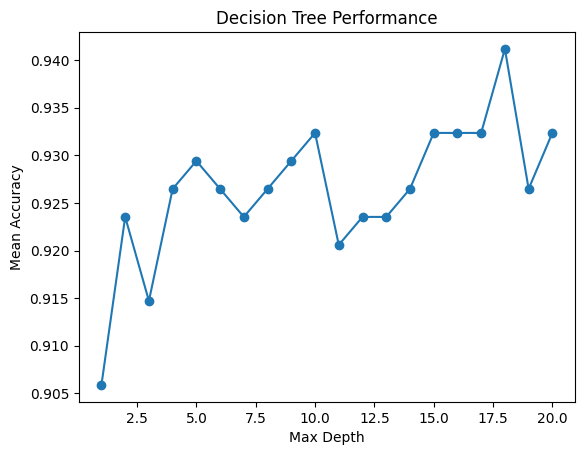

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Define the range of max_depth values to try
max_depth_values = range(1, 21)

# List to store the average cross-validation accuracies
mean_accuracies = []

# Iterate over the max_depth values
for max_depth in max_depth_values:
    # Initialize and fit the Decision Tree classifier
    dt = DecisionTreeClassifier(max_depth=max_depth)
    scores = cross_val_score(dt, X_train, y_train, cv=5)
    mean_accuracy = scores.mean()
    mean_accuracies.append(mean_accuracy)

# Plot the results
plt.plot(max_depth_values, mean_accuracies, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Mean Accuracy')
plt.title('Decision Tree Performance')
plt.show()


What depth do you choose and why?

## 3. Train a Random Forest and plot the decision areas based on that model.


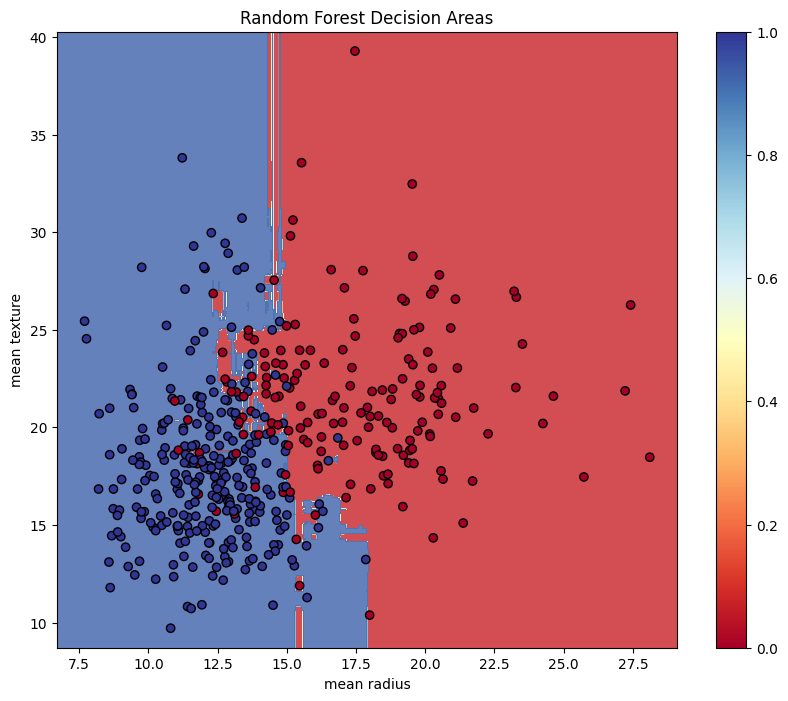

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data[:, :2]  # Select the first two features for simplicity
y = data.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Define the plot boundaries
plot_step = 0.02  # Step size for the meshgrid
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

# Create a meshgrid of points to plot the decision areas
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

# Predict the class for each meshgrid point
Z = rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a color map for the plot
cmap = plt.cm.RdYlBu

# Plot the decision areas
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap, edgecolors='k')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("Random Forest Decision Areas")
plt.colorbar()
plt.show()


## 4. Train a Logistic Regression and plot the decision areas based on that model.


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression classifier
logreg = LogisticRegression()
logreg.fit(X_train, y_train)



LogisticRegression()

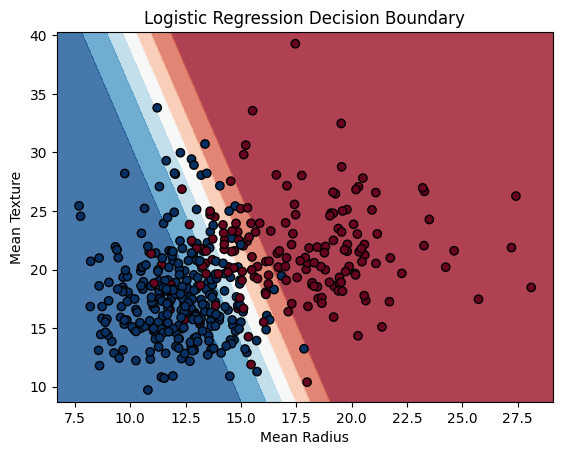

In [24]:
# Generate a meshgrid of points
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
h = 0.02  # Step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the probabilities for each point in the meshgrid
Z = logreg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the training points
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu, edgecolors='k')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Logistic Regression Decision Boundary')
plt.show()


## 5 . Compare the performance between all that models.
For each model, compute:
- Accuracy
- Precision
- Recall
- AUC  
Your results should be displayed in a DataFrame, with the column names specifying the model used, and the row indexes specifying the metric. (The same as you did in the regression homework).  
It is worth spending some time coding a nice scoring function for a list of models, as it will be very useful on the exam :D

In [30]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

def evaluate_models(models, X, y):
    metrics = {
        'Accuracy': [],
        'Precision': [],
        'Recall': [],
        'AUC': []
    }
    
    roc_curves = {}

    for model_name, model in models.items():
        y_pred = model.predict(X)
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred)
        recall = recall_score(y, y_pred)
        auc = roc_auc_score(y, y_pred)

        metrics['Accuracy'].append(accuracy)
        metrics['Precision'].append(precision)
        metrics['Recall'].append(recall)
        metrics['AUC'].append(auc)
        

    metrics_df = pd.DataFrame(metrics, index=models.keys())
    return metrics_df


In [34]:
models = {
    'Logistic Regression': logreg,
    'Decision Tree': dt,
    'Random Forest': rf,
    "KNN" : knn
}

# Fit the Logistic Regression model
logreg.fit(X_train, y_train)

# Fit the Decision Tree model
dt.fit(X_train, y_train)

# Fit the Random Forest model if needed
rf.fit(X_train, y_train)

knn.fit(X_train, y_train)



performance_metrics = evaluate_models(models, X_test, y_test)
print(performance_metrics)


                     Accuracy  Precision    Recall       AUC
Logistic Regression  0.912281   0.917808  0.943662  0.902064
Decision Tree        0.868421   0.937500  0.845070  0.876024
Random Forest        0.894737   0.915493  0.915493  0.887979
KNN                  0.903509   0.928571  0.915493  0.899607


### Optional: display the ROC curves of your models (on the same graph)

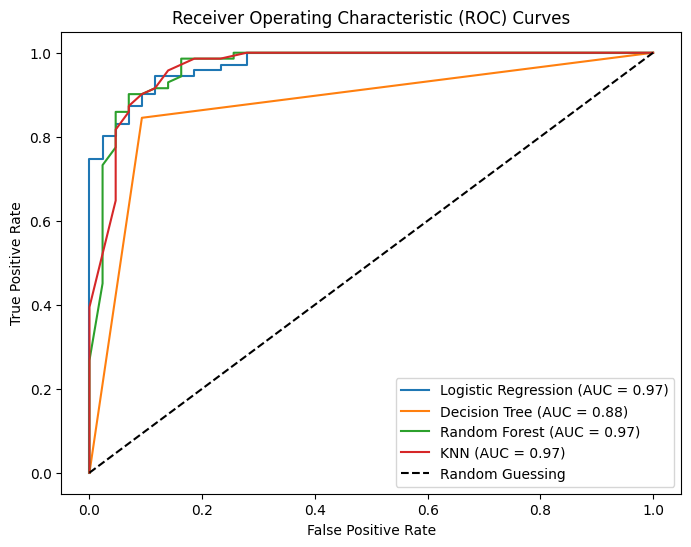

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score

# Evaluate and plot ROC curves for each model
plt.figure(figsize=(8, 6))
for model_name, model in models.items():
    # Predict probabilities for positive class
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and AUC score
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

# Plot random guessing line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')

# Show the plot
plt.show()


## 6. Pick the best model and compute its generalization performance on the test set. 

Explain what model you choose, based on what metric, and explain your choice.

In [36]:
# Assuming `performance_metrics` contains the evaluation metrics dataframe
best_model_name = performance_metrics['Accuracy'].idxmax()
best_model_accuracy = performance_metrics.loc[best_model_name, 'Accuracy']

# Get the corresponding model object
best_model = models[best_model_name]

# Compute the generalization performance on the test set
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Best Model: ", best_model_name)
print("Accuracy on Validation Set: ", best_model_accuracy)
print("Accuracy on Test Set: ", test_accuracy)


Best Model:  Logistic Regression
Accuracy on Validation Set:  0.9122807017543859
Accuracy on Test Set:  0.9122807017543859


Score the model (all metrics) on the test set

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluate models on the test set
evaluation_metrics = {}
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    evaluation_metrics[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC AUC': roc_auc
    }

# Display the evaluation metrics
for model_name, metrics in evaluation_metrics.items():
    print(f'{model_name} Evaluation Metrics:')
    for metric_name, metric_value in metrics.items():
        print(f'{metric_name}: {metric_value:.4f}')
    print()


Logistic Regression Evaluation Metrics:
Accuracy: 0.9123
Precision: 0.9178
Recall: 0.9437
F1-score: 0.9306
ROC AUC: 0.9731

Decision Tree Evaluation Metrics:
Accuracy: 0.8684
Precision: 0.9375
Recall: 0.8451
F1-score: 0.8889
ROC AUC: 0.8760

Random Forest Evaluation Metrics:
Accuracy: 0.8947
Precision: 0.9155
Recall: 0.9155
F1-score: 0.9155
ROC AUC: 0.9669

KNN Evaluation Metrics:
Accuracy: 0.9035
Precision: 0.9286
Recall: 0.9155
F1-score: 0.9220
ROC AUC: 0.9654

